# Single exponential smoothing

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import axes

In [3]:
ibm_df = pd.read_csv('https://github.com/sri-spirited/Practical-Time-Series-Analysis-Python/raw/master/Data%20Files/ibm-common-stock-closing-prices.csv')

ibm_df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [4]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)

In [5]:
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

ibm_df['SES'] = single_exp_smoothing(ibm_df['Close_Price'], 0.8)

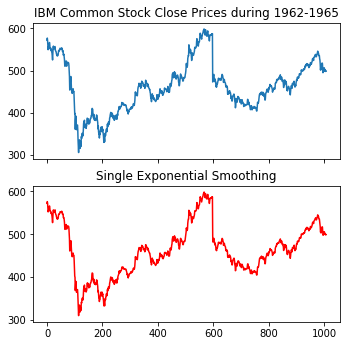

In [9]:
fig = plt.figure(figsize=(5.5, 5.5))
ax0 = fig.add_subplot(211)
ibm_df['Close_Price'].plot(ax=ax0)
ax0.set_title('IBM Common Stock Close Prices during 1962-1965')
ax1 = fig.add_subplot(2,1,2)
ibm_df['SES'].plot(ax=ax1, color='r', sharex=ax0)
ax1.set_title('Single Exponential Smoothing');

In [10]:
ibm_df['SES2'] = single_exp_smoothing(ibm_df['Close_Price'], 0.2)
ibm_df['SES6']= single_exp_smoothing(ibm_df['Close_Price'], 0.6)
ibm_df['SES8']= single_exp_smoothing(ibm_df['Close_Price'], 0.8)

Text(0.5, 1.0, 'Alpha 0.8')

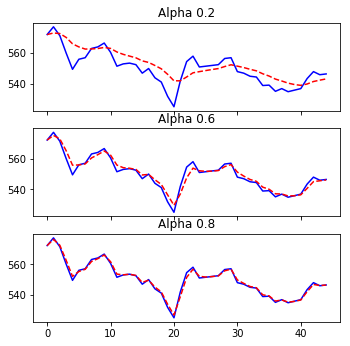

In [12]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 5.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')


So alpha has a huge impact on forecasting; thus, getting the right alpha value is critical while setting up forecasting.

# Second order  exponential smoothing

In [13]:
beer_df = pd.read_csv('https://github.com/sri-spirited/Practical-Time-Series-Analysis-Python/raw/master/Data%20Files/quarterly-beer-production-in-aus-March%201956-June%201994.csv')

print('Shape of the dataframe:', beer_df.shape)

beer_df.head(2)

Shape of the dataframe: (155, 2)


,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
0,1956Q1,284.4
1,1956Q2,212.8


In [14]:
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994': 'Beer_Prod'}, inplace=True)

In [15]:
print(beer_df.shape)
beer_df.dropna(inplace=True)
print('Shape after removing missing values:', beer_df.shape)

(155, 2)
Shape after removing missing values: (154, 2)


In [16]:
def double_exp_smoothing(x, alpha, beta):
    yhat = [x[0]]
    for t in range(1, len(x)):
        if t==1:
            F, T= x[0], x[1] - x[0]
        F_n_1, F = F, alpha*x[t] + (1-alpha)*(F+T)
        T=beta*(F-F_n_1)+(1-beta)*T
        yhat.append(F+T)
    return yhat

In [17]:
beer_df['DEF00'] = double_exp_smoothing(beer_df['Beer_Prod'],0, 0)
beer_df['DEF01'] = double_exp_smoothing(beer_df['Beer_Prod'],0, 1)
beer_df['DEF10'] = double_exp_smoothing(beer_df['Beer_Prod'],1, 0)
beer_df['DEF11'] = double_exp_smoothing(beer_df['Beer_Prod'],1, 1)

Text(0.5, 1.0, 'TES: alpha=1, beta=0')

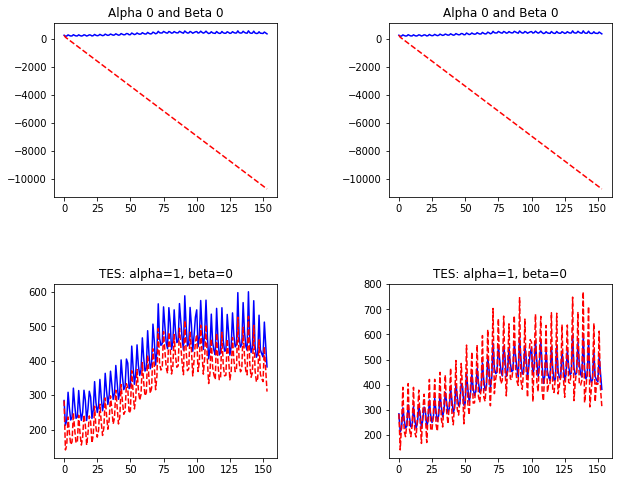

In [18]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(2,2,1)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF00'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('Alpha 0 and Beta 0')

ax = fig.add_subplot(2,2,2)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF01'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('Alpha 0 and Beta 0')

ax = fig.add_subplot(2,2,3)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF10'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0')

ax = fig.add_subplot(2,2,4)
beer_df['Beer_Prod'].plot(color='b', linestyle = '-', ax=ax)
beer_df['DEF11'].plot(color='r', linestyle = '--', ax=ax)
ax.set_title('TES: alpha=1, beta=0')

In [19]:
beer_df['DEF'] = double_exp_smoothing(beer_df['Beer_Prod'], 0.4, 0.7)

Text(0.5, 1.0, 'Double Smoothing Forecast')

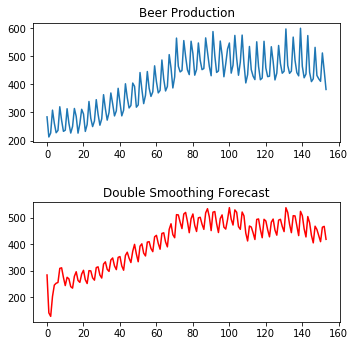

In [20]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
fig.subplots_adjust(hspace=.5)
beer_df['Beer_Prod'].plot(ax=ax)
ax.set_title('Beer Production')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')

In [21]:
def single_exp_smoothing(x, alpha):
    F = [x[0]]
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F
beer_df['Single_Exponential_Forecast'] = single_exp_smoothing(beer_df['Beer_Prod'], 0.4)

Text(0.5, 1.0, 'Double Smoothing Forecast')

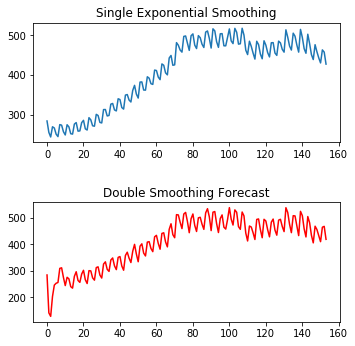

In [22]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
fig.subplots_adjust(hspace=.5)
beer_df['Single_Exponential_Forecast'].plot(ax=ax)
ax.set_title('Single Exponential Smoothing')
ax = fig.add_subplot(2,1,2)
beer_df['DEF'].plot(ax=ax, color='r')
ax.set_title('Double Smoothing Forecast')

Text(0.5, 1.0, 'Actual Vs Single Smoothing Forecasting')

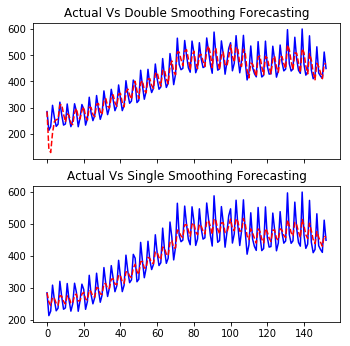

In [23]:

f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[0])
beer_df['DEF'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Actual Vs Double Smoothing Forecasting')

beer_df['Beer_Prod'].iloc[:153].plot(color='b', linestyle = '-', ax=axarr[1])
beer_df['Single_Exponential_Forecast'].iloc[:153].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Actual Vs Single Smoothing Forecasting')